In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from gensim.models.word2vec import Word2Vec
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant
from keras.utils import to_categorical
from pyvi import ViTokenizer
import string
import re
import numpy as np

Using TensorFlow backend.
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df=pd.read_csv('news_dataset.csv')

In [3]:
df.head()

text          label
0   Nhân tài… đến rồi đi Trong cuộc khảo sát nhan...  Chinhtrixahoi
1  Tử hình Lâm Bích Thủy và Toàn '6 Ngón'  \n Hôm...           Khac
2   Dùng ống chích tống tiền 1 tỉ đồng Tối 19-12,...           Khac
3  Mekong Capital tăng đầu tư vào VN \n Ông Chris...           Khac
4  Tàu hoả húc xe tải gây ách tắc hơn 9 giờ \n Đo...  Chinhtrixahoi

In [4]:
texts=df['text']

In [7]:
def clean(text):
    text=ViTokenizer.tokenize(text)
    text=text.lower()
    text=text.replace('\n', '. ')
    return text

In [8]:
texts=[clean(a) for a in texts]

In [9]:
texts

['nhân_tài … đến rồi đi trong cuộc khảo_sát nhanh với nhiều bạn thủ_khoa tốt_nghiệp đại_học năm 2004 và 2005 , tất_cả đều muốn “ vào làm_việc trong các cơ_quan nhà_nước ” . nhưng thực_tế : đa_số họ hiện đang làm ở các cơ_quan ... ngoài nhà_nước . thủ_khoa ngành y_tế cộng_đồng ( đại_học y_hn - năm 2004 ) ngô_thị_thanh_hương bộc_bạch : “ quê tôi ở thái_bình , nên quả_thực là sau khi ra trường tôi rất mong_muốn có một lời mời nào đó từ phía các cơ_quan nhà_nước trên địa_bàn hn , và tôi đã nộp hồ_sơ . nhưng các cơ_quan phù_hợp với chuyên_ngành của tôi trả_lời rằng họ sẵn_sàng chấp_hành nghiêm_túc chính_sách thu_hút nhân_tài của cấp trên , nhưng hiện_nay ... chưa có chỉ_tiêu . tôi có hỏi ý_kiến thầy_giáo của mình thì thầy nói rằng y_tế cộng_đồng là một ngành học mới , vì_thế khó có_thể nói thủ_đô không có nhu_cầu về nhân_sự trong lĩnh_vực này ” . bạn thanh_hương cho biết sau một thời_gian ngắn_“ thăng_hoa ” với danh_hiệu thủ_khoa , bạn đã nhanh_chóng rơi vào tình_trạng ... bơ_vơ vì chưa tìm

In [10]:
def clean_text(text):
    text = re.sub('<.*?>', '', text).strip()
    text = re.sub('(\s)+', r'\1', text)
    return text

In [11]:
texts=[clean_text(a) for a in texts]

In [12]:
stop_words=pd.read_csv('vietnamese-stopwords.txt',encoding='utf-8')

In [22]:
new_label=['stopwords']
stop_words.columns=new_label
list_stopwords = stop_words['stopwords']
def remove_stopword(text):
    pre_text = []
    words = text.split()
    for word in words:
        if word not in list_stopwords:
            pre_text.append(word)
        text2 = ' '.join(pre_text)
    return text2

In [24]:
texts=[remove_stopword(text) for text in texts]

In [25]:
texts

['nhân_tài … đến rồi đi trong cuộc khảo_sát nhanh với nhiều bạn thủ_khoa tốt_nghiệp đại_học năm 2004 và 2005 , tất_cả đều muốn “ vào làm_việc trong các cơ_quan nhà_nước ” . nhưng thực_tế : đa_số họ hiện đang làm ở các cơ_quan ... ngoài nhà_nước . thủ_khoa ngành y_tế cộng_đồng ( đại_học y_hn - năm 2004 ) ngô_thị_thanh_hương bộc_bạch : “ quê tôi ở thái_bình , nên quả_thực là sau khi ra trường tôi rất mong_muốn có một lời mời nào đó từ phía các cơ_quan nhà_nước trên địa_bàn hn , và tôi đã nộp hồ_sơ . nhưng các cơ_quan phù_hợp với chuyên_ngành của tôi trả_lời rằng họ sẵn_sàng chấp_hành nghiêm_túc chính_sách thu_hút nhân_tài của cấp trên , nhưng hiện_nay ... chưa có chỉ_tiêu . tôi có hỏi ý_kiến thầy_giáo của mình thì thầy nói rằng y_tế cộng_đồng là một ngành học mới , vì_thế khó có_thể nói thủ_đô không có nhu_cầu về nhân_sự trong lĩnh_vực này ” . bạn thanh_hương cho biết sau một thời_gian ngắn_“ thăng_hoa ” với danh_hiệu thủ_khoa , bạn đã nhanh_chóng rơi vào tình_trạng ... bơ_vơ vì chưa tìm

In [26]:
word_vec=Word2Vec.load('vi.bin').wv

In [27]:
sequences=[ViTokenizer.tokenize(a) for a in texts]
X=[]
for b in texts:
    words=b.split(" ")
    article_vec=np.zeros((100))
    for word in words:
        if str(word) in word_vec:
            article_vec+=word_vec[str(word)]
    X.append(article_vec)

In [28]:
sequences=[]
for a in texts:
    sequence=ViTokenizer.tokenize(a)
    sequences.append(sequence)

In [29]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
tokenizer.fit_on_texts(sequences)

In [30]:
tokenizer.word_index

{'và': 1,
 'của': 2,
 'có': 3,
 'các': 4,
 'là': 5,
 'cho': 6,
 'được': 7,
 'trong': 8,
 'không': 9,
 'đã': 10,
 'một': 11,
 'người': 12,
 'với': 13,
 'những': 14,
 'để': 15,
 'về': 16,
 'đến': 17,
 'này': 18,
 'sẽ': 19,
 'ở': 20,
 'tại': 21,
 'cũng': 22,
 'vào': 23,
 'khi': 24,
 'năm': 25,
 'anh': 26,
 'phải': 27,
 'ra': 28,
 'tôi': 29,
 'đó': 30,
 'ông': 31,
 'từ': 32,
 'nhiều': 33,
 'theo': 34,
 'thì': 35,
 'nhưng': 36,
 'ngày': 37,
 'trên': 38,
 'còn': 39,
 'như': 40,
 'làm': 41,
 'nước': 42,
 'lại': 43,
 'mà': 44,
 'việc': 45,
 'cô': 46,
 'bị': 47,
 'biết': 48,
 'chỉ': 49,
 'sau': 50,
 '2': 51,
 'hơn': 52,
 'đi': 53,
 '1': 54,
 '”': 55,
 '“': 56,
 'nhà': 57,
 'mới': 58,
 '3': 59,
 'đang': 60,
 'mình': 61,
 'nói': 62,
 'trước': 63,
 'bạn': 64,
 'ấy': 65,
 'số': 66,
 'vì': 67,
 'bộ': 68,
 'vẫn': 69,
 '000': 70,
 'chưa': 71,
 'hai': 72,
 'đồng': 73,
 'có_thể': 74,
 'khác': 75,
 'sự': 76,
 'tp': 77,
 'lên': 78,
 'đây': 79,
 'nên': 80,
 'rất': 81,
 'nếu': 82,
 'họ': 83,
 'tới': 84,
 'c

In [31]:
sequences_digit=tokenizer.texts_to_sequences(sequences)

In [33]:
MAX_SEQUENCE_LENGTH = max(len(x) for x in sequences)

In [34]:
MAX_SEQUENCE_LENGTH

13885

In [36]:
data=pad_sequences(sequences_digit,maxlen=MAX_SEQUENCE_LENGTH)

In [37]:
print('shape of data tensor:',data.shape)

shape of data tensor: (400, 13885)


In [38]:
df['new_label']=[0 if a=='Chinhtrixahoi' else 1 for a in df['label']]
labels = to_categorical(np.asarray(df['new_label']))
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

In [39]:
y_train.shape

(320, 2)

In [40]:
word_index=tokenizer.word_index

In [41]:
word_vect=Word2Vec.load('vi.bin').wv

In [42]:
EMBEDDING_DIM=100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

In [43]:
index2word = word_vect.index2word
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if str(word) not in word_vect:
        embedding_vector=0
    else:
        embedding_vector = word_vect[str(word)]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [44]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [45]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(2, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

hist=model.fit(X_train, y_train,
          batch_size=64,
          epochs=30,
          validation_data=(X_test, y_test))

Train on 320 samples, validate on 80 samples
Epoch 1/30
320/320 [==============================] - ETA: 1:04 - loss: 1.1961 - acc: 0.421 - ETA: 45s - loss: 2.9396 - acc: 0.484 - ETA: 29s - loss: 2.2621 - acc: 0.48 - ETA: 14s - loss: 1.9073 - acc: 0.49 - 80s 251ms/step - loss: 1.6644 - acc: 0.4984 - val_loss: 0.6799 - val_acc: 0.6188
Epoch 2/30
320/320 [==============================] - ETA: 1:02 - loss: 0.6739 - acc: 0.593 - ETA: 46s - loss: 0.7251 - acc: 0.539 - ETA: 29s - loss: 0.7025 - acc: 0.56 - ETA: 14s - loss: 0.7009 - acc: 0.54 - 82s 255ms/step - loss: 0.7146 - acc: 0.5250 - val_loss: 0.6582 - val_acc: 0.6188
Epoch 3/30
320/320 [==============================] - ETA: 55s - loss: 0.6343 - acc: 0.63 - ETA: 43s - loss: 0.6309 - acc: 0.67 - ETA: 30s - loss: 0.6404 - acc: 0.63 - ETA: 14s - loss: 0.6370 - acc: 0.61 - 84s 262ms/step - loss: 0.6325 - acc: 0.6641 - val_loss: 0.6921 - val_acc: 0.4875
Epoch 4/30
320/320 [==============================] - ETA: 1:20 - loss: 0.5868 - acc: 0.

320/320 [==============================] - ETA: 1:06 - loss: 0.0025 - acc: 1.000 - ETA: 50s - loss: 0.0020 - acc: 1.000 - ETA: 33s - loss: 0.0021 - acc: 1.00 - ETA: 16s - loss: 0.0019 - acc: 1.00 - 92s 288ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5197 - val_acc: 0.8375
Epoch 30/30
320/320 [==============================] - ETA: 1:07 - loss: 0.0012 - acc: 1.000 - ETA: 50s - loss: 0.0012 - acc: 1.000 - ETA: 33s - loss: 0.0011 - acc: 1.00 - ETA: 16s - loss: 0.0011 - acc: 1.00 - 91s 285ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5266 - val_acc: 0.8562


In [ ]:
print(hist.history.keys())

In [47]:
import matplotlib.pyplot as plt

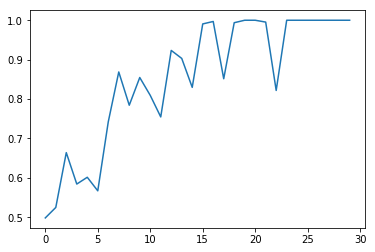

In [48]:
plt.plot(hist.history['acc'])

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()